# PSF energy calculation test
2022-02-28 H. Akitaya

In [1]:
import numpy as np

In [2]:
def gaussian(x, mu, sig):
    return 1.0/(np.sqrt(2.0*np.pi)*sig)*np.exp(-(x-mu)**2/(2.0*sig**2))

In [3]:
gaussian(1.0, 0.0, 1.0)

0.24197072451914337

In [4]:
from scipy import integrate

In [5]:
mu = 0.0
sig = 1.0
integrate.quad(gaussian, -np.inf, np.inf, args=(mu, sig))


(0.9999999999999997, 1.0178191381553302e-08)

In [6]:
integrate.quad(gaussian, -1, 1, args=(mu, sig))

(0.682689492137086, 7.579375928402476e-15)

In [7]:
def gaussian_2d(x, y, mu1, mu2, sig1, sig2):
    return gaussian(x, mu1, sig1) * gaussian(y, mu2, sig2)

In [8]:
mu1 = mu2 = 0
sig1 = sig2 = 1
integrate.dblquad(gaussian_2d, -np.inf, np.inf, -np.inf, np.inf, (mu1, mu2, sig1, sig2))

(1.0000000000000324, 1.3150127836580739e-08)

In [9]:
def normalized_arccos(x):
    return 1.0/np.pi*np.arccos(x)

In [10]:
normalized_arccos(1.0)

0.0

In [11]:
integrate.quad(normalized_arccos, -1, 1)

(1.0, 1.1102230246251565e-14)

In [12]:
import matplotlib.pyplot as plt

In [13]:
fig1 = plt.figure()

<Figure size 432x288 with 0 Axes>

In [14]:
def sinusoidal_vibration_distribution(x, amplitude):
    if -np.abs(amplitude) <= x <= np.abs(amplitude):
        return 1.0/np.pi*np.arccos(x/amplitude)
    else:
        return 0.0

In [15]:
sinusoidal_vibration_distribution(1.0, 1.0)

0.0

In [16]:
sinusoidal_vibration_distribution(1.0, 0.5)

0.0

In [17]:
x = np.array(range(-500, 501, 1))
x = x /100

In [18]:
x

array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ])

In [19]:
sinusoidal_vibration_distribution_np = np.vectorize(sinusoidal_vibration_distribution)

In [20]:
y = sinusoidal_vibration_distribution_np(x, 1.0)

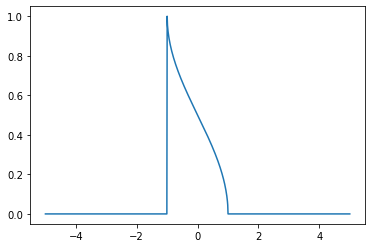

In [21]:
plt.plot(x, y)

In [22]:
def deriv_svd(x):
    return 1.0/np.pi/np.sqrt(1-x**2)

In [23]:
deriv_svd_np = np.vectorize(deriv_svd)

In [24]:
y2 = deriv_svd_np(x)

<ipython-input-22-e3d989920794>:2: RuntimeWarning: invalid value encountered in sqrt
  return 1.0/np.pi/np.sqrt(1-x**2)
<ipython-input-22-e3d989920794>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/np.pi/np.sqrt(1-x**2)


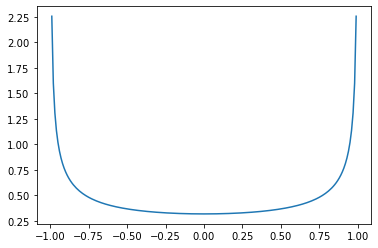

In [25]:
plt.plot(x,y2)

In [26]:
testf = lambda x, y: x+y

In [27]:
testf(1,2)

3

In [28]:
a=1
def arcsin_prob(x, a):
    if -np.abs(a) < x < np.abs(a):
        return 1/np.pi/np.sqrt(a**2-x**2)
    elif np.abs(x) == np.abs(a):
        return 0
    else:
        return 0

In [29]:
arcsin_prob(1,1)

0

In [30]:
integrate.quad(deriv_svd, -1, -0.999)

(0.01423643740187963, 3.062532172304344e-11)

In [31]:
integrate.quad(arcsin_prob, -1.2, -0.99, 1)

(0.04505341416052066, 1.3579390820139814e-08)

In [32]:
integrate.quad(arcsin_prob, -1.00, -0.99, 1)

(0.04505341364276004, 5.364099026072822e-10)

In [33]:
def fwhm2sigma(fwhm):
    return fwhm/2.0/np.sqrt(2.0*np.log(2.0))

In [34]:
fwhm2sigma(2.0)

0.8493218002880191

In [35]:
x, y = np.meshgrid(np.linspace(-10,10,2001), np.linspace(-10,10,2001))

In [36]:
y

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.99,  -9.99,  -9.99, ...,  -9.99,  -9.99,  -9.99],
       [ -9.98,  -9.98,  -9.98, ...,  -9.98,  -9.98,  -9.98],
       ...,
       [  9.98,   9.98,   9.98, ...,   9.98,   9.98,   9.98],
       [  9.99,   9.99,   9.99, ...,   9.99,   9.99,   9.99],
       [ 10.  ,  10.  ,  10.  , ...,  10.  ,  10.  ,  10.  ]])

In [37]:
x

array([[-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ],
       [-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ],
       [-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ],
       ...,
       [-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ],
       [-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ],
       [-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ]])

In [38]:
dst = np.sqrt(x*x+y*y)

In [39]:
dst

array([[14.14213562, 14.13506632, 14.12800057, ..., 14.12800057,
        14.13506632, 14.14213562],
       [14.13506632, 14.12799349, 14.12092419, ..., 14.12092419,
        14.12799349, 14.13506632],
       [14.12800057, 14.12092419, 14.11385135, ..., 14.11385135,
        14.12092419, 14.12800057],
       ...,
       [14.12800057, 14.12092419, 14.11385135, ..., 14.11385135,
        14.12092419, 14.12800057],
       [14.13506632, 14.12799349, 14.12092419, ..., 14.12092419,
        14.12799349, 14.13506632],
       [14.14213562, 14.13506632, 14.12800057, ..., 14.12800057,
        14.13506632, 14.14213562]])

In [40]:
sigma = 0.1

In [41]:
gauss = np.exp(-(dst**2)/(2.0*sigma**2))

In [42]:
gauss

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

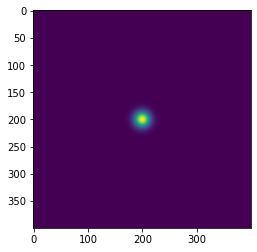

In [43]:
plt.imshow(gauss[800:1200, 800:1200])

In [44]:
x[1000,1000]

0.0

In [45]:
np.sum(gauss)

628.3185307179588

In [46]:
1.0/(1.0/(2.0*np.pi)/sigma**2)*10000.0

628.3185307179587

In [47]:
import photutils

In [48]:
ap = photutils.CircularAperture((1000,1000), 10)

In [49]:
ap.do_photometry(gauss)

(array([247.0411705]), array([], dtype=float64))

In [50]:
r = np.linspace(0.1,100,1000)

In [51]:
r

array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
         9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
        10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,  10.8,
        10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,  11.7,
        11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,  12.6,
        12.7,  12.8,

In [52]:
fluxes = []
for r_item in r:
    ap = photutils.CircularAperture((1000, 1000), r_item)
    flux, _ = ap.do_photometry(gauss)
    fluxes.append(flux[0])

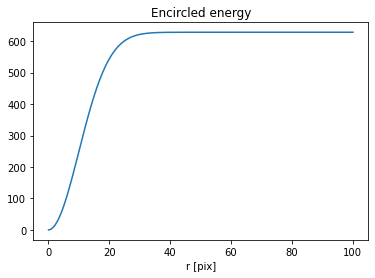

In [53]:
plt.title('Encircled energy')
plt.xlabel('r [pix]')
plt.plot(r, fluxes)

# Create discreat values from a function

In [54]:
import numpy as np
from scipy import integrate

In [55]:
def test_function(x, sig):
    return 1.0/np.sqrt(2.0*np.pi)/sig * np.exp(-x**2/(2.0*sig**2))

In [56]:
def make_discreate_values(func, funcargs, x1, x2, resolution):
    xs = np.linspace(x1, x2, resolution+1)
    vals = []
    x_mid = []
    integ = 0.0
    for i in range(0, resolution):
        di, _ = integrate.quad(func, float(xs[i]), float(xs[i+1]), funcargs)
        vals.append(di)
        x_mid.append(xs[i] + (xs[i+1]-xs[i])/2.0)
    return x_mid, vals

In [57]:
funcargs = (10.0)
x_mid, vals = make_discreate_values(test_function, funcargs, -500, 500, 1001)

In [58]:
print(x_mid)

[-499.5004995004995, -498.50149850149853, -497.5024975024975, -496.50349650349654, -495.5044955044955, -494.50549450549454, -493.5064935064935, -492.50749250749254, -491.5084915084915, -490.50949050949055, -489.5104895104895, -488.51148851148855, -487.5124875124875, -486.51348651348655, -485.5144855144855, -484.51548451548456, -483.5164835164835, -482.51748251748256, -481.5184815184815, -480.51948051948057, -479.5204795204795, -478.52147852147857, -477.5224775224775, -476.5234765234766, -475.5244755244755, -474.5254745254746, -473.5264735264735, -472.5274725274725, -471.5284715284715, -470.52947052947053, -469.53046953046953, -468.5314685314685, -467.53246753246754, -466.5334665334665, -465.53446553446554, -464.5354645354645, -463.53646353646354, -462.5374625374625, -461.53846153846155, -460.5394605394605, -459.54045954045955, -458.5414585414585, -457.54245754245756, -456.5434565434565, -455.54445554445556, -454.5454545454545, -453.54645354645356, -452.5474525474525, -451.5484515484515

In [59]:
print(vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4e-323, 1.917e-321, 8.776e-320, 3.981324e-318, 1.7882397e-316, 7.952272244e-315, 3.50126097393e-313, 1.526249191757e-311, 6.58709817621613e-310, 2.8146899106997964e-308, 1.1907887205926517e-306, 4.987772187441815e-305, 2.0684558350241273e-303, 8.49285378337107e-302, 3.452461137217511e-300, 1.3895421084228549e-298, 5.537100329807536e-297, 2.1845442492756403e-295, 8.533104751987531e-294, 3.300054339349585e-292, 1.263580437

In [60]:
np.sum(vals)

0.9999999999999999

In [61]:
import matplotlib.pyplot as plt

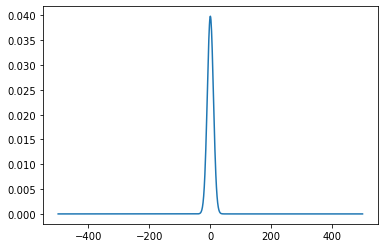

In [62]:
plt.plot(x_mid, vals)

In [63]:
def dist_sinusoidal(x, a):
    if np.abs(x) < np.abs(a):
        return a/np.pi/np.sqrt(1-(x/a)**2)
    else:
        return 0.0

In [64]:
a = 10.0
x_sind, y_sind = make_discreate_values(dist_sinusoidal, a, -50, 50, 101)
y_sind = np.array(y_sind)
y_sind /= 100.0

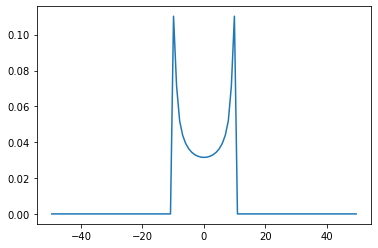

In [65]:
plt.plot(x_sind, y_sind)

In [66]:
np.sum(y_sind)

1.0000000000017208

In [67]:
print(x_sind[0:20])

[-49.504950495049506, -48.51485148514851, -47.524752475247524, -46.53465346534654, -45.54455445544554, -44.554455445544555, -43.56435643564356, -42.57425742574257, -41.584158415841586, -40.59405940594059, -39.603960396039604, -38.613861386138616, -37.62376237623762, -36.633663366336634, -35.64356435643565, -34.65346534653465, -33.663366336633665, -32.67326732673267, -31.683168316831683, -30.693069306930695]


In [68]:
vals_sindconv = np.convolve(vals, y_sind, 'same')

In [69]:
len(vals_sindconv)

1001

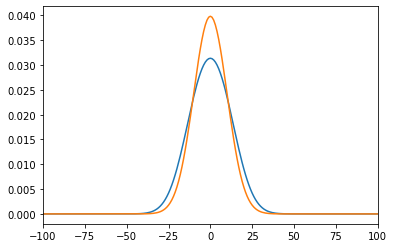

In [70]:
plt.xlim([-100,100])
plt.plot(x_mid, vals_sindconv, x_mid, vals)

In [71]:
import scipy.signal

In [72]:
# gauss_sindconv = np.convolve(gauss, y_sind, 'same')

In [73]:
# gauss_sindconv = scipy.signal.convolve2d(gauss, y_sind, 'same')

In [74]:
y_sind_2d = [y_sind]  # convert to 2-dimension

In [75]:
gauss_sindconv = scipy.signal.convolve2d(gauss, y_sind_2d, 'same')

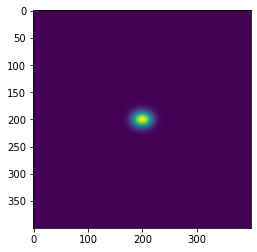

In [76]:
plt.imshow(gauss_sindconv[800:1200,800:1200])

In [77]:
ps = 2.0  # arcsec/pix
resolution = 100
IMG_SIZE_MAX = 1000  # Image size. (pix)
IMG_CNTR_PIX = np.array([np.int64(IMG_SIZE_MAX / 2.0), np.int64(IMG_SIZE_MAX / 2.0)])

In [78]:
print(IMG_CNTR_PIX)

[500 500]


In [79]:
class Coord(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [80]:
coord_pix = np.array([2,2])

In [81]:
def xpix2ximg(coord_pix, ps, resolution=1.0):
    result = (coord_pix - IMG_CNTR_PIX + 0.5) * ps / resolution
    return result


In [82]:
type(coord_pix)

numpy.ndarray

In [83]:
print(coord_pix)

[2 2]


In [84]:
result = xpix2ximg(coord_pix, ps, resolution=resolution)

In [85]:
print(result)

[-9.95 -9.95]


In [86]:
coord_pix = np.array([0, 0])

In [87]:
res2 = xpix2ximg(coord_pix, ps, resolution=resolution)

In [88]:
res2

array([-9.99, -9.99])

In [89]:
print(res2)

[-9.99 -9.99]


In [90]:
fwhm_arcsec = 2.0  # Stellar image size (fwhm in arcsec)

In [91]:
ps = 2.0  # Pixel scale. (arcsec/pix)

In [92]:
sigma_pix =  fwhm2sigma(fwhm_arcsec) / ps * resolution

In [93]:
sigma_pix

42.466090014400955

In [94]:
from photutils.datasets import make_gaussian_sources_image
from astropy.table import Table

In [95]:
sources = Table()

In [96]:
sources['flux'] = [1.0]
sources['x_mean'] = [IMG_SIZE_MAX/2]
sources['y_mean'] = [IMG_SIZE_MAX/2]
sources['x_stddev'] = [sigma_pix]
sources['y_stddev'] = [sigma_pix]
tshape = (IMG_SIZE_MAX, IMG_SIZE_MAX)

In [97]:
img = make_gaussian_sources_image(tshape, sources)

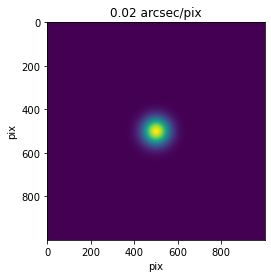

In [98]:
plt.xlabel('pix')
plt.ylabel('pix')
plt.title('{} arcsec/pix'.format(ps/resolution))
plt.imshow(img)

In [99]:
np.sum(img)

0.9999999999999998

In [100]:
# flat distribution
pv_arcsec = 2.0  # arcsec
def f_flat(x, pv_arcsec):
    if np.abs(x) < np.abs(pv_arcsec/2.0):
        return 1.0/pv_arcsec
    else:
        return 0

In [108]:
f_flat_dist = make_discreate_values(f_flat, (pv_arcsec), -pv_arcsec*2, pv_arcsec*2, np.int32(1.0/ps*resolution*pv_arcsec*4))

In [109]:
f_flat_dist

([-3.99,
  -3.9699999999999998,
  -3.95,
  -3.9299999999999997,
  -3.91,
  -3.8899999999999997,
  -3.87,
  -3.8499999999999996,
  -3.83,
  -3.8099999999999996,
  -3.79,
  -3.7699999999999996,
  -3.75,
  -3.73,
  -3.71,
  -3.6900000000000004,
  -3.67,
  -3.6500000000000004,
  -3.63,
  -3.6100000000000003,
  -3.59,
  -3.5700000000000003,
  -3.55,
  -3.5300000000000002,
  -3.51,
  -3.49,
  -3.4699999999999998,
  -3.45,
  -3.4299999999999997,
  -3.41,
  -3.3899999999999997,
  -3.37,
  -3.3499999999999996,
  -3.33,
  -3.3099999999999996,
  -3.29,
  -3.27,
  -3.25,
  -3.23,
  -3.21,
  -3.19,
  -3.17,
  -3.1500000000000004,
  -3.13,
  -3.1100000000000003,
  -3.09,
  -3.0700000000000003,
  -3.05,
  -3.0300000000000002,
  -3.01,
  -2.99,
  -2.9699999999999998,
  -2.95,
  -2.9299999999999997,
  -2.91,
  -2.8899999999999997,
  -2.87,
  -2.8499999999999996,
  -2.83,
  -2.81,
  -2.79,
  -2.77,
  -2.75,
  -2.73,
  -2.71,
  -2.69,
  -2.67,
  -2.65,
  -2.63,
  -2.61,
  -2.59,
  -2.5700000000000003,
  

In [110]:
np.sum(f_flat_dist[1])

1.0

In [111]:
len(f_flat_dist[0]), len(f_flat_dist[1])

(400, 400)

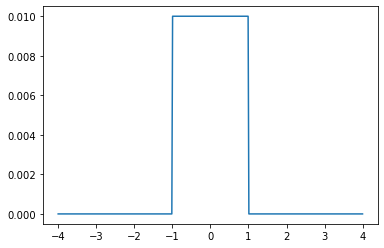

In [112]:
plt.plot(f_flat_dist[0], f_flat_dist[1])

In [113]:
len(f_flat_dist[0])

400

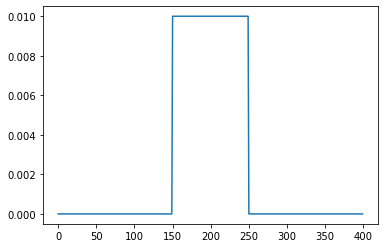

In [114]:
plt.plot(f_flat_dist[1])

In [116]:
np.sum(f_flat_dist[1])

1.0

In [135]:
a_sin = 2.0
f_sin_dist = make_discreate_values(dist_sinusoidal, a_sin, -a_sin*2, a_sin*2, np.int32(1.0/ps*resolution*a_sin))

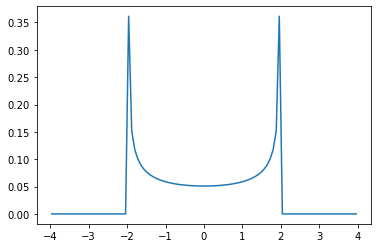

In [136]:
plt.plot(f_sin_dist[0], f_sin_dist[1])

In [137]:
np.sum(f_sin_dist[1])

4.000000000002389